# Project: Investigate a Dataset - [Medical Appointment No Shows]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. There are 14 characteristics about the patient are included in each row.

- PatientID: Identification of a patient
- AppointmentID: Identification of each appointment
- Gender: Male or Female
- AppointmentDay: The day of the actuall appointment, when they have to visit the doctor.
- ScheduledDay: The day someone called or registered the appointment, this is before appointment of course.
- Age: How old is the patient
- Neighbourhood: Where the appointment takes place
- Scholarship: True or False
- Hipertension: True or False
- Diabetes: True or False 
- Alcoholism: True or False
- Handcap: True or False
- SMS_received: 1 or more messages sent to the patient
- No-show: True or False

### Question(s) for Analysis
- What factors are important for us to know to predict if a patient will show up for their scheduled appointment?
    - Is age related to whether a patient will show or not?
    - Are patients who have scholarships more likely to show up at their appointments?
    - Are patients who received more SMS more likely to show up at their appointments?
    - Is the time difference between the scheduled and appointment time related to whether a patient will show up?
    - Does patients with health problems show up or not?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

In [2]:
# Load data
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.shape

(110527, 14)

The data has 110527 records with 14 properties

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


We can see that the data has no null-contain columns. However, some features need to be changed in their 'datatype', such as ScheduledDay, AppointmentDay should be datetime, PatientId and No-show should be 'int'

In [5]:
# Check for duplicate records
df.duplicated().sum()

0

There is no duplicate records in this dataset

In [6]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


We can achieve some information from this summary statistic. 
- The average age of the patient is about 37 years old. The minimum value of patient age is -1, which is not appropriate for this feature, we will need to look more and process this value after.
- Other features which just have 2 values, 0 or 1 seem to be a boolean feature that can interpret like 'yes' or 'no'.


### Data Cleaning
 

First, I will look at the records which have Patient's age < 0

In [7]:
df[df['Age']<0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


There is just a records, maybe it is just some typing mistake so I will remove it from the data

In [8]:
df.drop(df.loc[df['Age']<0].index, inplace=True)

Re-formatting the datatype

In [9]:
df['ScheduledDay'] =  pd.to_datetime(df['ScheduledDay'], format='%Y-%m-%d %H:%M:%S')
df['AppointmentDay'] =  pd.to_datetime(df['AppointmentDay'], format='%Y-%m-%d %H:%M:%S')

Drop some columns since they do not bring me any information. 

In [10]:
df.drop(['PatientId','AppointmentID'], axis=1,inplace=True)

Rename columns to make it easier for access

In [11]:
df.rename(str.lower, axis='columns',inplace=True)

In [12]:
df.rename(columns = {'scheduledday':'scheduled_day','appointmentday':'appointment_day',
                     'no-show':'no_show'},inplace=True)

I will create a column named 'awaited_day', calculated by the day between the appointment day and the scheduled day

In [13]:
df['awaited_day'] = (df['appointment_day'].dt.date-df['scheduled_day'].dt.date).dt.days

In [14]:
df['awaited_day'].describe()

count    110526.000000
mean         10.183794
std          15.255034
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: awaited_day, dtype: float64

Seems that some awaited day records have negative values, I will check on those records

In [15]:
df[df['awaited_day']<0]

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,awaited_day
27033,M,2016-05-10 10:51:53+00:00,2016-05-09 00:00:00+00:00,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,-1
55226,F,2016-05-18 14:50:41+00:00,2016-05-17 00:00:00+00:00,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,-1
64175,F,2016-05-05 13:43:58+00:00,2016-05-04 00:00:00+00:00,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,-1
71533,F,2016-05-11 13:49:20+00:00,2016-05-05 00:00:00+00:00,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,-6
72362,M,2016-05-04 06:50:57+00:00,2016-05-03 00:00:00+00:00,7,TABUAZEIRO,0,0,0,0,0,0,Yes,-1


It can be seen that the scheduled day occurred before the appointment day, which I assume is some typing mistake from the employee. Since there are just 5 records, I will remove them from the data.

In [16]:
df.drop(df.loc[df['awaited_day']<0].index, inplace=True)

Let's see the appointment no-show proportion of the dataset.

In [17]:
df['no_show'].value_counts()

No     88207
Yes    22314
Name: no_show, dtype: int64

There are 88207 patients who showed up at the appointment and 22314 patients did not show up.

I will encode no_show value from yes/ no to 1/0.

In [18]:
df['no_show'] = df['no_show'].replace('Yes',1)
df['no_show'] = df['no_show'].replace('No',0)

Checking on handcap columns

In [19]:
df['handcap'].value_counts()

0    108282
1      2040
2       183
3        13
4         3
Name: handcap, dtype: int64

Besides 0 and 1 like other features, this column has 5 unique values. I assume that this value is the number of handicaps that a patient has. I can see that the number of patients who have more than 2 handicaps is really small, so I will replace it with 1. So my data will only have patients who have/ do not have handicap

In [20]:
df['handcap'] = df['handcap'].replace([2,3,4],1)

In [21]:
df['handcap'].value_counts()

0    108282
1      2239
Name: handcap, dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

### Is age related to whether a patient will show or not?

In [22]:
import warnings
warnings.filterwarnings("ignore")

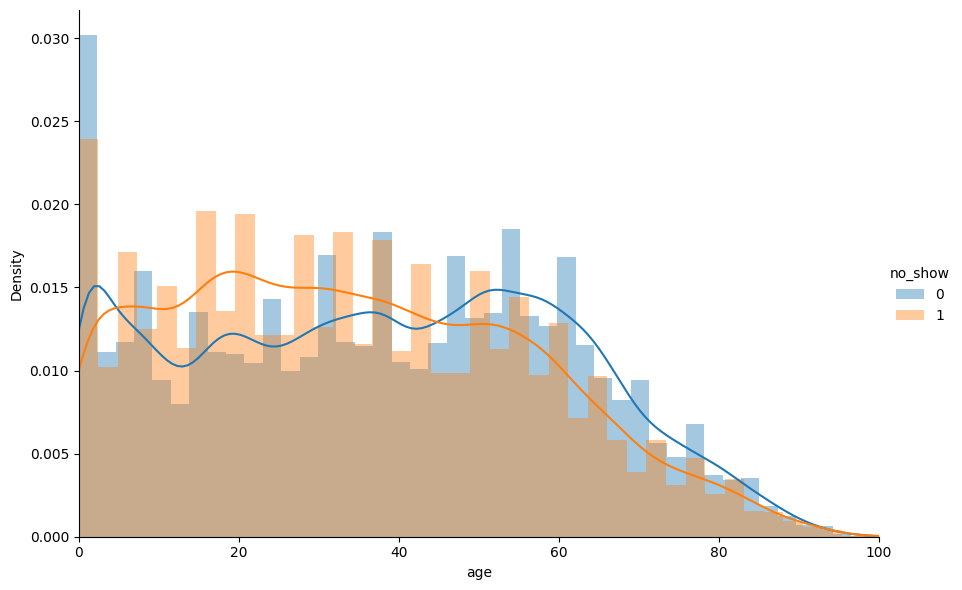

In [23]:
sns.FacetGrid(df, hue = "no_show", height=6, aspect=1.5).map(sns.distplot, "age").add_legend()
plt.xlim(0,100)
plt.show()

I divided patient ages into 3 bins: Childs (0-15), Adults (15-40), and Seniors (40-100)

In [24]:
label=['Childs','Adults','Seniors']
bins=[0,15,40,100]
df['age_bin']=pd.cut(df['age'],bins=bins,labels=['Childs','Adults','Seniors'])
df.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,awaited_day,age_bin
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0,Seniors
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0,Seniors
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,0,Seniors
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0,Childs
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0,Seniors


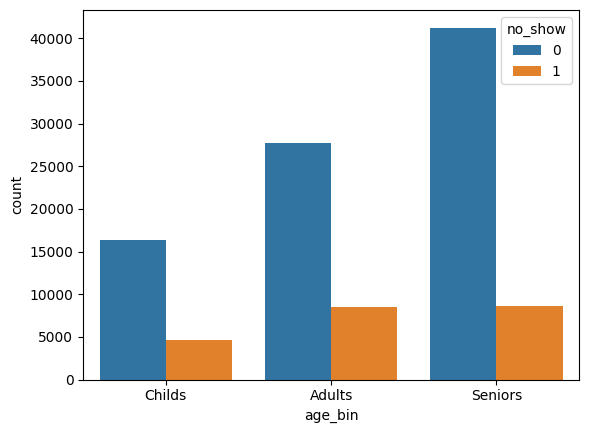

In [25]:
sns.countplot(x='age_bin',data=df,hue='no_show')
plt.show()

We can see that Seniors patients have the highest percentage of showing up at appointments, while Childs patients have the lowest percentage of showing up. But to make sure, I will calculate the percentage of each group.

In [26]:
df_no_show = df[df['no_show']==1]
df_show = df[df['no_show']==0]

In [27]:
def percent(col, value):
    print(f'No show percentage: {df_no_show[df_no_show[col]==value].shape[0]/df[df[col]==value].shape[0]}')
    print(f'Show percentage: {df_show[df_show[col]==value].shape[0]/df[df[col]==value].shape[0]}')    

In [28]:
for i in label:
    print('-',i)
    percent('age_bin',i)

- Childs
No show percentage: 0.22018348623853212
Show percentage: 0.7798165137614679
- Adults
No show percentage: 0.23392797967524578
Show percentage: 0.7660720203247542
- Seniors
No show percentage: 0.17242901575198155
Show percentage: 0.8275709842480184


As we can see, Seniors have the highest percentage of showing up and the lowest percentage of no-show. 

### Are patients who have scholarships more likely to show up at their appointments?


In [29]:
import seaborn as sns

<AxesSubplot: xlabel='scholarship', ylabel='count'>

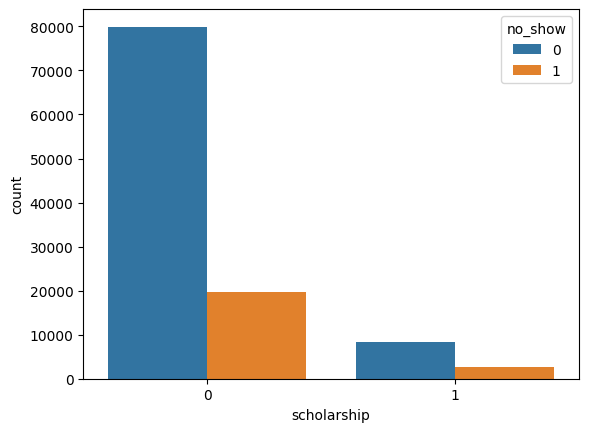

In [30]:
sns.countplot(x='scholarship',data=df,hue='no_show')

In [31]:
print('- Patients who do not have scholarship')
percent('scholarship',0)
print('- Patients who have scholarship')
percent('scholarship',1)

- Patients who do not have scholarship
No show percentage: 0.19803331326510135
Show percentage: 0.8019666867348987
- Patients who have scholarship
No show percentage: 0.2373630420771568
Show percentage: 0.7626369579228433


Patients whether have scholarships or not are not too different in show/no-show percentage

### Are patients who received more SMS more likely to show up at their appointments?

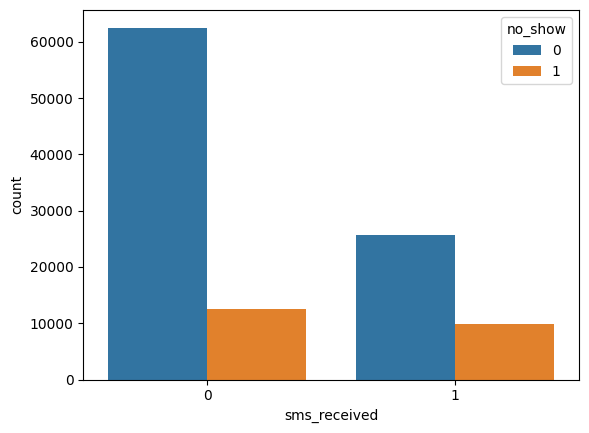

In [32]:
sns.countplot(x='sms_received',data=df,hue='no_show')
plt.show()

As we see from the graph above, patients who did not receive sms have a higher percentage of showing up at the appointment. To have a clear perspective, I will calculate the percentage for each group.

In [55]:
print('-Patient with sms_received')
percent('sms_received',1)
print('-Patient without sms_received')
percent('sms_received',0)

-Patient with sms_received
No show percentage: 0.27574544839637
Show percentage: 0.7242545516036301
-Patient without sms_received
No show percentage: 0.16697983715134795
Show percentage: 0.833020162848652


Patients who received sms have 27% of not showing up, whereas patients who did not receive sms have 16% of not showing up. This indicates that their sms campaign is not effective and they will need other plans.

### Is the time difference between the scheduled and appointment time related to whether a patient will show up?

<AxesSubplot: xlabel='awaited_day'>

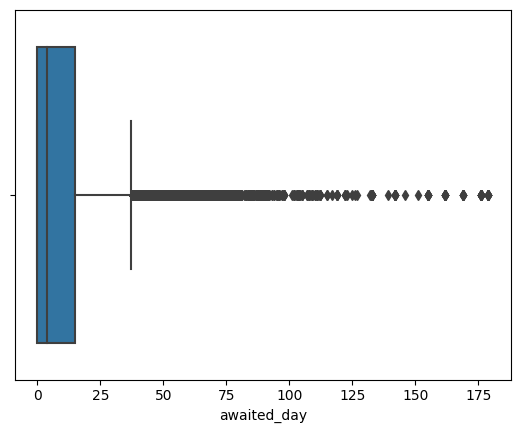

In [71]:
sns.boxplot(x=df["awaited_day"],hue=df['no_show'])

awaited_day is mostly distributed from 0 to 50. I will take a closer look at this range.

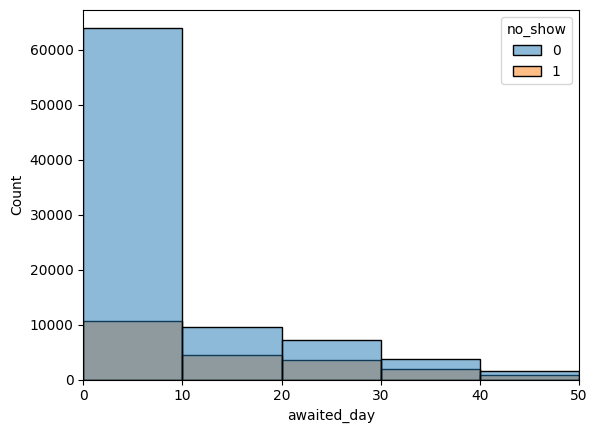

In [96]:
sns.histplot(data=df,x='awaited_day',hue='no_show',bins=[0,10,20,30,40,50])
plt.xlim(0,50)
plt.show()

There is a higher number of patient who show up at appointments if their awaited time is between 0 and 10 days. Other awaited ranges seem to have had the same proportion of show/no-show patients.

In [116]:
def df_percent(df):
    print(f'No show percent: {df[df.no_show ==1].shape[0]/df.shape[0]}')
    print(f'Show percent: {df[df.no_show ==0].shape[0]/df.shape[0]}')    

In [117]:
print('- Awaited day between 0-10 days')
df_percent(df0)
print('- Awaited day between 10-20 days')
df_percent(df1)
print('- Awaited day between 20-30 days')
df_percent(df2)
print('- Awaited day between 30-40 days')
df_percent(df3)
print('- Awaited day between 40-50 days')
df_percent(df4)

- Awaited day between 0-10 days
No show percent: 0.14609267170555373
Show percent: 0.8539073282944463
- Awaited day between 10-20 days
No show percent: 0.32093362509117435
Show percent: 0.6790663749088257
- Awaited day between 20-30 days
No show percent: 0.3258351033017957
Show percent: 0.6741648966982043
- Awaited day between 30-40 days
No show percent: 0.3449403616775683
Show percent: 0.6550596383224317
- Awaited day between 40-50 days
No show percent: 0.3328460038986355
Show percent: 0.6671539961013645


Patients who have to wait from 0 to 10 days have 14.6% of no show, whereas people who have to wait longer have around 30% of no-show.

### Does patient with health problems show up or not?

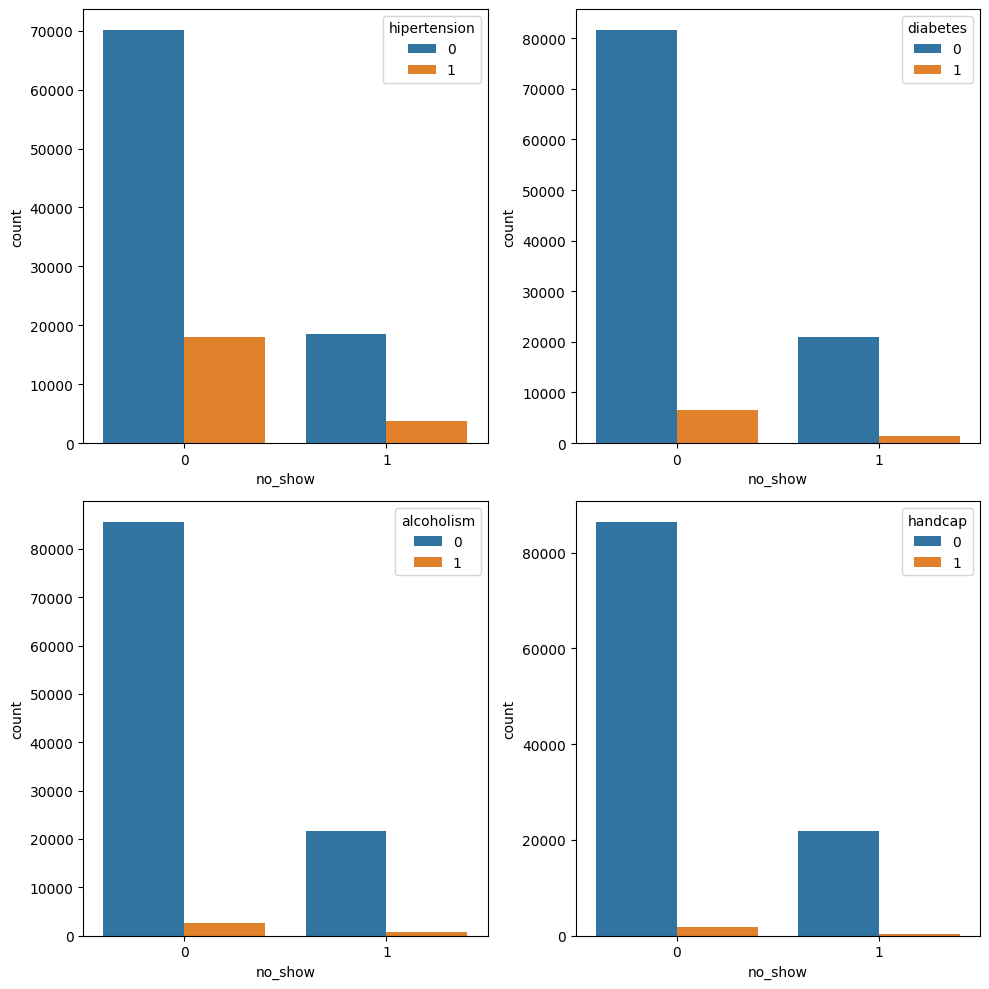

In [119]:
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(10,10))
sns.countplot(x='no_show' ,data=df,ax=ax[0][0],hue='hipertension')
sns.countplot(x='no_show' ,data=df,ax=ax[0][1],hue='diabetes')
sns.countplot(x='no_show' ,data=df,ax=ax[1][0],hue='alcoholism')
sns.countplot(x='no_show' ,data=df,ax=ax[1][1],hue='handcap')
plt.tight_layout()

In [120]:
disease_show = np.array([df_show['hipertension'].value_counts()[1], df_show['diabetes'].value_counts()[1], df_show['alcoholism'].value_counts()[1], df_show['handcap'].value_counts()[1]])
disease_no_show = np.array([df_no_show['hipertension'].value_counts()[1], df_no_show['diabetes'].value_counts()[1], df_no_show['alcoholism'].value_counts()[1], df_no_show['handcap'].value_counts()[1]])

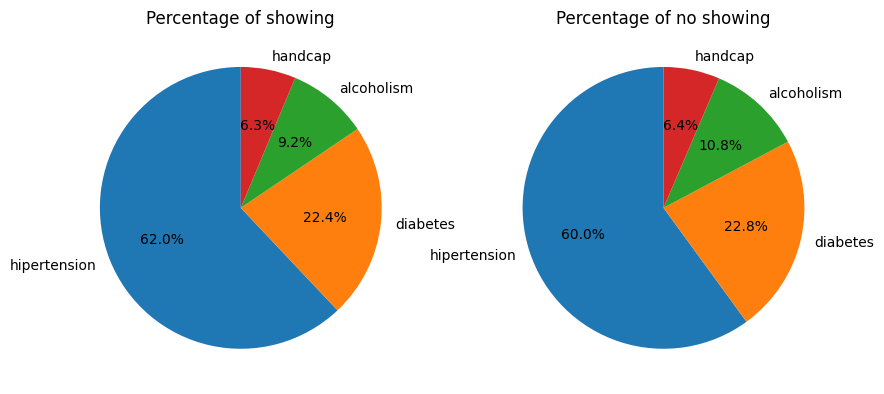

In [124]:
mylabels = ["hipertension", "diabetes", "alcoholism", "handcap"]
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(121)
ax1.pie(disease_show, labels = mylabels, startangle = 90, autopct = '%1.1f%%')
plt.title('Percentage of showing')
ax2 = fig.add_subplot(122)
ax2.pie(disease_no_show, labels = mylabels, startangle = 90, autopct = '%1.1f%%')
plt.title('Percentage of no showing')

plt.show() 

I assume that there are no differences between patients who already had diseases and patients who did not.

<a id='conclusions'></a>
## Conclusions

> After exploring and analyzing the dataset, I had some conclusions that could answer my research questions above.
- Patients who in range 15-40 years old have the highest percentage of showing up at the appointment than other age ranges.
- The time between the scheduled and appointment time is the most effective feature to predict whether a patient will show up.
- This medical appointment system had a not good marketing campaign by sms. They will need to adjust and have some plans to make sure the patient will show up at the appointment.
- Scholarship and some disease features do not make a different to distinguish show/no-show group.


In [ ]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb